<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Week 3)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information: 

**Age:** Age of the employee 

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

## Table of Content

1. **[Decision tree](#dtree)**
2. **[Random forest](#rf)**

**Import the required libraries**

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,8]

import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None

pd.options.display.max_rows = None
 

from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler 


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import random

#### Load the csv file

In [2]:
df = pd.read_csv("emp_attrition.csv")

In [3]:
df

,,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,No,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,No,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8
5,35,No,Travel_Rarely,Human Resources,8,Technical Degree,3,Male,3,1,Human Resources,3,4323,1,No,17,3,5
6,34,No,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,2,Healthcare Representative,4,7756,0,No,17,3,6
7,30,No,Travel_Frequently,Research & Development,2,Technical Degree,4,Female,2,1,Research Scientist,1,4968,0,No,16,3,9
8,37,No,Travel_Rarely,Sales,6,Medical,3,Male,3,2,Sales Executive,4,6502,4,No,14,3,5
9,26,Yes,Travel_Frequently,Human Resources,17,Life Sciences,2,Female,3,1,Human Resources,3,2741,0,Yes,11,3,7


### Let's begin with some hands-on practice exercises

<a id="dtree"> </a>
## 1. Decision tree

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Write a code to detect the outliers in the dataset. Remove the outliers using IQR method, if present.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

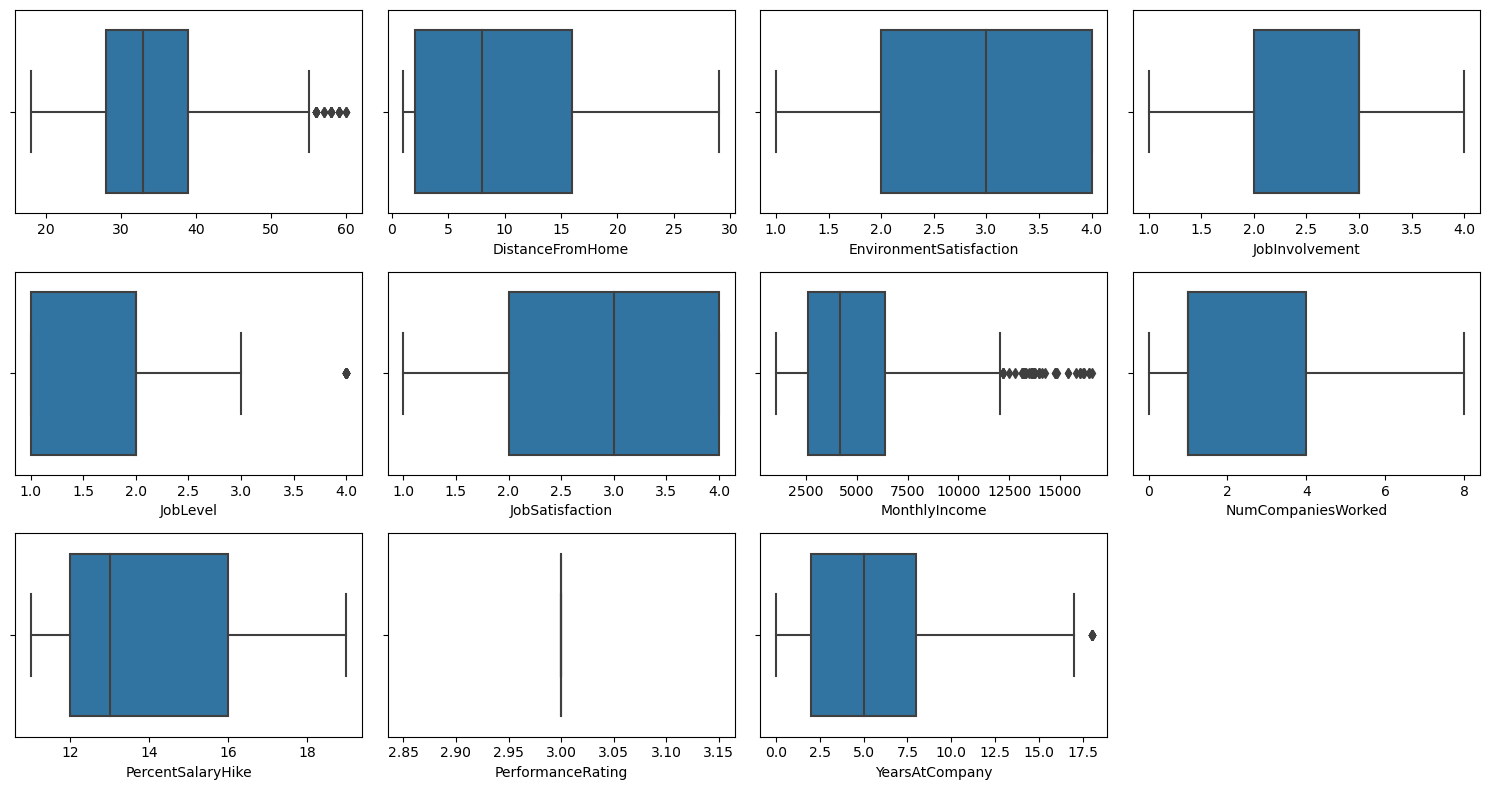

In [4]:
n=1
#plt.figure(figsize=(12,8))
for i in df.select_dtypes('number'):
    plt.subplot(3,4,n)
    sns.boxplot(x=df[i])
    n+=1
plt.tight_layout()
plt.show()

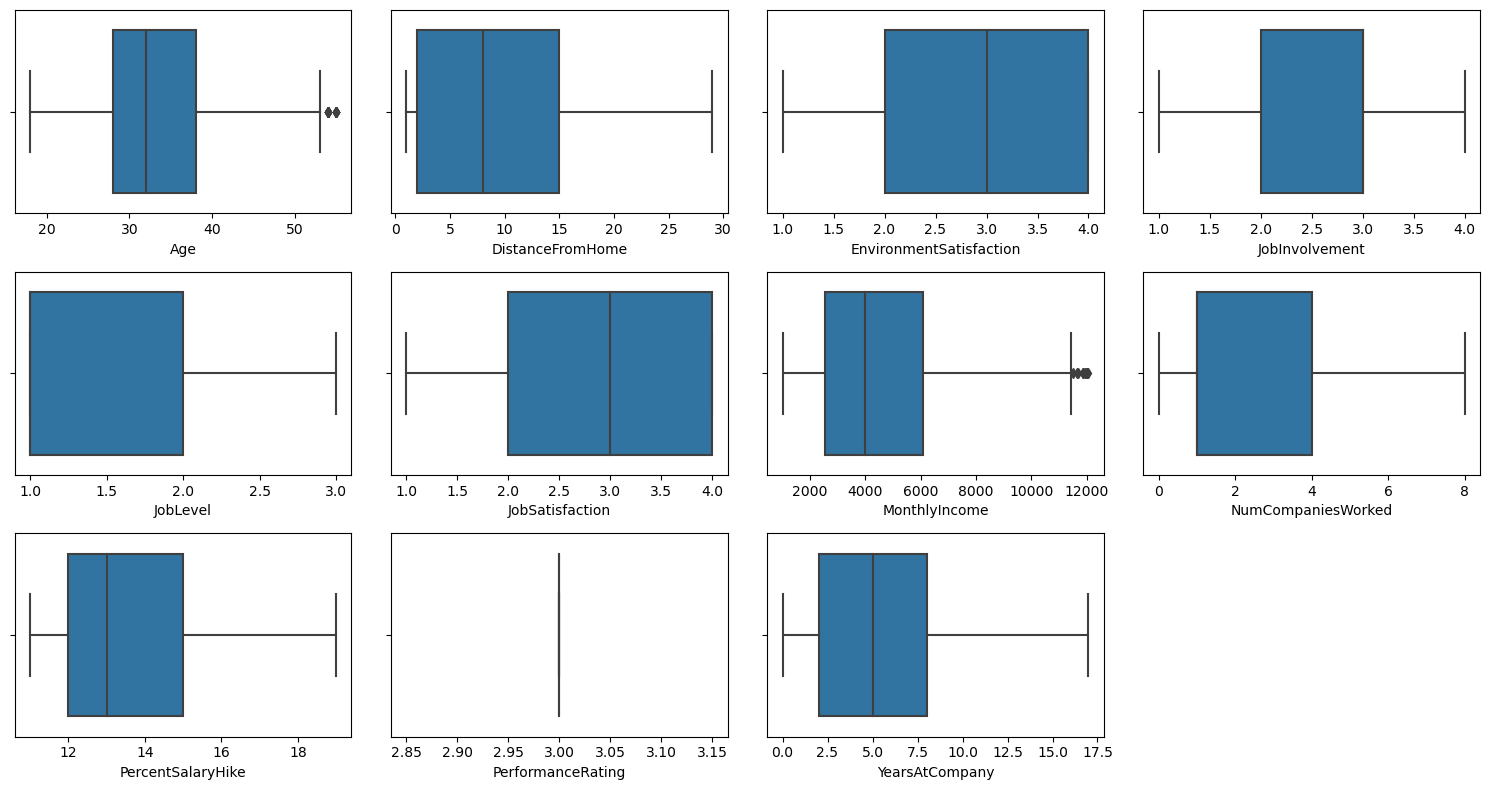

In [9]:
n=1
#plt.figure(figsize=(12,8))
for i in df_trimmed.select_dtypes('number'):
    plt.subplot(3,4,n)
    sns.boxplot(x=df_trimmed[i])
    n+=1
plt.tight_layout()
plt.show()

In [10]:
df.describe()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany
count,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.0,1580.000000
mean,34.339241,9.743671,2.648734,2.660127,1.705696,2.668354,4957.425949,2.470886,13.942405,3.0,5.206329
std,8.828037,8.227881,1.107876,0.755176,0.800629,1.105636,3059.158533,2.232193,2.425033,0.0,3.949229
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.0,0.000000
25%,28.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2571.750000,1.000000,12.000000,3.0,2.000000
50%,33.000000,8.000000,3.000000,3.000000,2.000000,3.000000,4148.000000,1.000000,13.000000,3.0,5.000000
75%,39.000000,16.000000,4.000000,3.000000,2.000000,4.000000,6397.000000,4.000000,16.000000,3.0,8.000000
max,60.000000,29.000000,4.000000,4.000000,4.000000,4.000000,16555.000000,8.000000,19.000000,3.0,18.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1580 non-null   int64 
 1   Attrition                1580 non-null   object
 2   BusinessTravel           1580 non-null   object
 3   Department               1580 non-null   object
 4   DistanceFromHome         1580 non-null   int64 
 5   EducationField           1580 non-null   object
 6   EnvironmentSatisfaction  1580 non-null   int64 
 7   Gender                   1580 non-null   object
 8   JobInvolvement           1580 non-null   int64 
 9   JobLevel                 1580 non-null   int64 
 10  JobRole                  1580 non-null   object
 11  JobSatisfaction          1580 non-null   int64 
 12  MonthlyIncome            1580 non-null   int64 
 13  NumCompaniesWorked       1580 non-null   int64 
 14  OverTime                 1580 non-null  

In [10]:
df=df_trimmed.copy()
df.Attrition=df.Attrition.map({'Yes':1,'No':0})
df.BusinessTravel=df.BusinessTravel.map({'Non-Travel':0,'Travel_Rarely':1,'Travel_Frequently':2})
df.EducationField=df.EducationField.map(dict(df.EducationField.value_counts()/len(df)))
df.JobRole=df.JobRole.map(dict(df.JobRole.value_counts()/len(df)))
df.OverTime=df.OverTime.map({'Yes':1,'No':0})
df=pd.get_dummies(df,prefix_sep=' ',drop_first=True)
df.head()

,,Attrition,BusinessTravel,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany,Department Research & Development,Department Sales,Gender Male
0,33,1,2,3,0.386685,1,3,1,0.217888,1,3348,1,1,11,3,10,1,0,1
1,32,1,1,4,0.295225,4,1,3,0.248823,4,10400,1,0,11,3,14,0,1,1
2,40,1,1,9,0.386685,4,3,1,0.211836,1,2018,3,0,14,3,5,1,0,1
3,42,0,1,7,0.295225,2,4,2,0.217888,2,2372,6,1,16,3,1,1,0,0
4,43,0,2,27,0.386685,3,3,3,0.084734,1,10820,8,0,11,3,8,1,0,0


In [11]:
x=df[['EnvironmentSatisfaction','MonthlyIncome']]
y=df.Attrition
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=1)
d=DecisionTreeClassifier(random_state=1).fit(xtrain,ytrain)
p=d.predict(xtest)
print('Accuracy =',accuracy_score(ytest,p))

Accuracy = 0.8612975391498882


In [12]:
# type your code here
X = df.drop('Attrition',axis=1)
y = df.Attrition
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

dt= DecisionTreeClassifier(random_state=1)
dt_model = dt.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
print('Accuracy =',accuracy_score(y_test,p))

Accuracy = 0.4809843400447427


In [13]:
pd.DataFrame({'Features': X_train.columns, 'Importance': dt_model.feature_importances_}).sort_values(by='Importance',ascending=False)[:3]

,Features,Importance
0,,0.171844
9,MonthlyIncome,0.166276
2,DistanceFromHome,0.083397


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a model to predict whether or not an employee will leave the company based on employee's environment satisfaction and monthly income. Calculate the accuracy for the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Build a full model to predict if an employee will leave the company. Find three features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4.  Find the area under the receiver operating characteristic curve for full model built in question 3. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
def plot_roc_curve(model,X,y):
    y_pred=model.predict_proba(X)[:,1]
    fpr, tpr ,_= roc_curve(y, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr )
    plt.plot([0, 1], [0, 1])
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred),4)))
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) curve')
    plt.show()
plot_roc_curve(dt_model,X_test,y_pred)

NameError: name 'dt_model' is not defined

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Plot a confusion matrix for the full model built in Q3.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
X = df.drop('Attrition',axis=1)
y = df['Attrition']

score=list()
score = cross_val_score(DecisionTreeClassifier(random_state=1),X,y,cv=10,scoring= 'accuracy')
print(f'Accuracy:{round(np.mean(score),5)}')

Accuracy:0.90783


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Calculate the specificity, sensitivity, % of misclassified and correctly classified observations. What can you say about the model by looking at the sensitivity and specificity values? Is this a good model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
parameters= { 'criterion' : ['entropy', 'gini'],
                'max_depth': range(2, 10),
                'min_samples_split' :range(2,10)}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=1),param_grid=parameters,scoring='accuracy')
dt_grid_model = dt_grid.fit(X_train, y_train)
print('Best parameters: ', dt_grid_model.best_params_)

Best parameters:  {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 2}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build and plot a decision tree with maximum 5 terminal nodes.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
dt= DecisionTreeClassifier(random_state=1,
                           criterion=dt_grid_model..best_params_.get('criterion'),
                           max_depth = dt_grid_model.best_params_.get('max_depth'),
                            min_samples_split =dt_grid_model.best_params_.get('min_samples_split'))

SyntaxError: invalid syntax (1244167537.py, line 2)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a Decision Tree model with the predefined parameters and find the average accuracy by performing the 10 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. For a decision tree model, find the best value of hyperparameters "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the values as:
        
     criterion = ['entropy', 'gini'],
     max_depth = range(2, 10),
     min_samples_split = range(2,10)

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>10. Build a decision tree model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Build 5 decision trees each with 20 random features. Also predict the attrition for test set for each model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Create a new dataframe "model_predictions_df" by appending each prediction made in question 8. There will be 5 columns in the dataframe for each prediction using the decision tree models built in above question.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a new column "Voted_Result" in the dataframe "model_predictions_df" that contains the maximum occuring value (mode) of the 5 columns in the dataframe (row-wise).<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Consider the values of "Voted_Result" as our new predictions and store its values in a variable "new_y_pred" and find the accuracy and the roc-auc score using new_y_pred.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<a id="rf"> </a>
## 2. Random Forest

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a random forest full model to predict if an employee will leave the company or not and generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
X = df.drop('Attrition',axis=1)
y = df['Attrition']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

rf = RandomForestClassifier(random_state=1,n_estimators=100)
rf_model = rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       245
           1       0.91      0.95      0.92       202

    accuracy                           0.93       447
   macro avg       0.93      0.93      0.93       447
weighted avg       0.93      0.93      0.93       447



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. For a random forest model, find the best value of hyperparameters "n_estimators", "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    criterion = ['entropy', 'gini'],
    n_estimators = [90, 100, 150, 200],
    max_depth = [10, 15, 20],
    min_samples_split = [2, 5, 8]

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Build a random forest model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Using the tuned random forest model, find the features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Build a random forest model using the top 10 most important features.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Plot a confusion matrix and area under the receiver operating characteristic curve for the model built in question 19. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here